# 📊 Student Marks Prediction Mini-Project
**Objective:** Predict student final marks based on study hours, attendance, previous marks, and assignments.  
**Portfolio Ready:** Complete end-to-end ML workflow.


In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Display plots inline
%matplotlib inline


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
data = {
    'study_hours': np.random.randint(1, 10, 100),
    'attendance': np.random.uniform(0.5, 1.0, 100),
    'previous_marks': np.random.randint(30, 95, 100),
    'assignments': np.random.randint(1, 5, 100),
    'final_marks': np.random.randint(40, 100, 100) # Target variable
}
df = pd.DataFrame(data)

df.head()


,study_hours,attendance,previous_marks,assignments,final_marks
0,7,0.691463,30,4,96
1,4,0.985856,77,2,68
2,8,0.924457,41,2,53
3,5,0.860865,66,4,67
4,7,0.617992,61,3,44


**Dataset Overview:**  
- 100 students  
- Features: Study_Hours, Attendance, Previous_Marks, Assignment_Score  
- Target: Marks


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   study_hours     100 non-null    int64  
 1   attendance      100 non-null    float64
 2   previous_marks  100 non-null    int64  
 3   assignments     100 non-null    int64  
 4   final_marks     100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


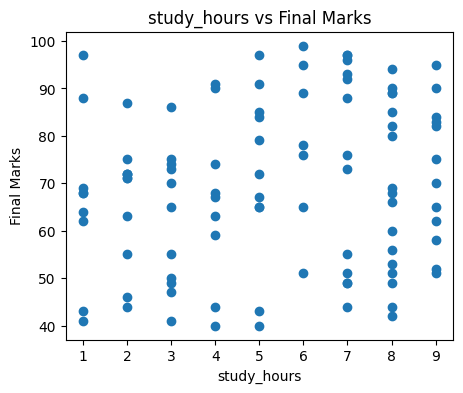

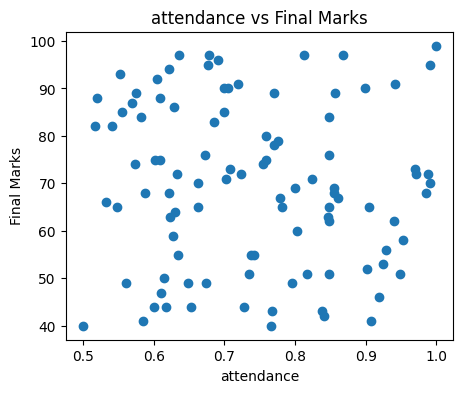

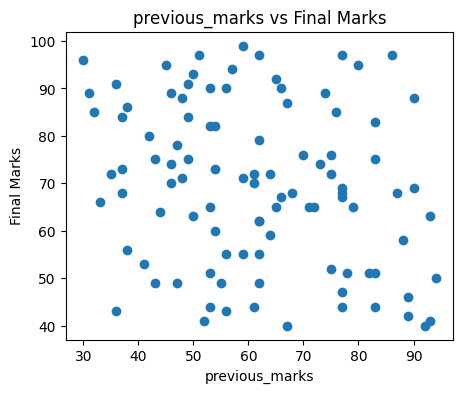

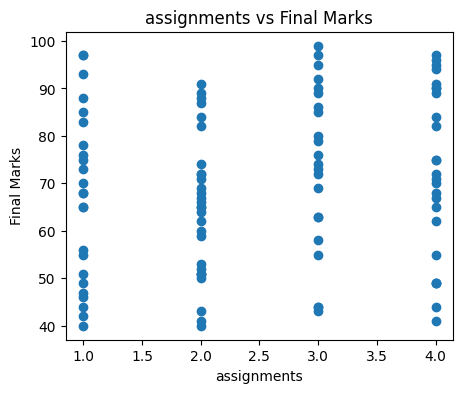

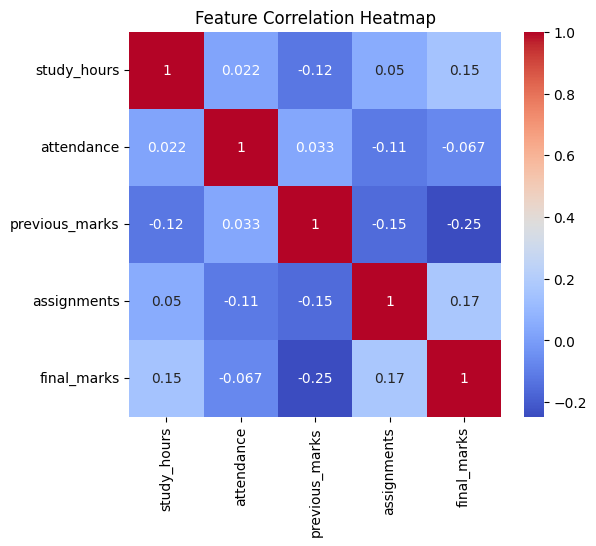

In [ ]:
# Dataset info
df.info()

# Descriptive statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Scatter plots of features vs target
features = ['study_hours', 'attendance', 'previous_marks', 'assignments']
for feature in features:
    plt.figure(figsize=(5,4))
    plt.scatter(df[feature], df['final_marks'])
    plt.xlabel(feature)
    plt.ylabel('Final Marks')
    plt.title(f'{feature} vs Final Marks')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

**Observations:**  
- Study hours, attendance, and previous marks are positively correlated with final marks.  
- Scatter plots and correlation heatmap help identify influential features.


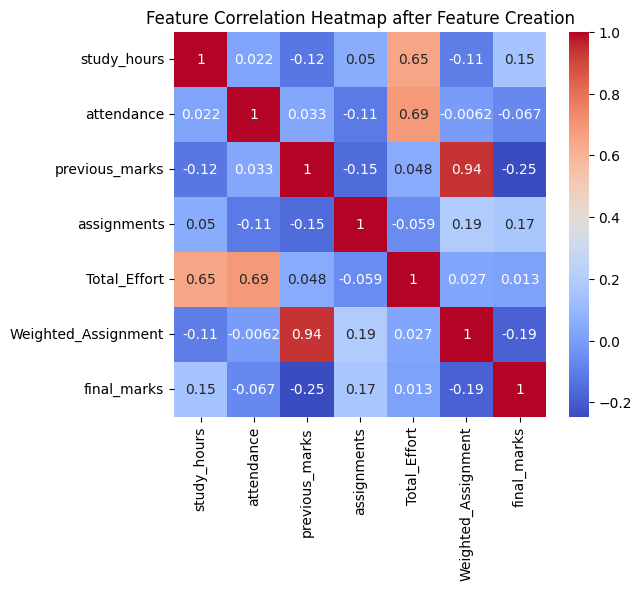

In [ ]:
# Features and target
X = df[['study_hours', 'attendance', 'previous_marks', 'assignments']]
y = df['final_marks']

# Scale numeric features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Feature creation
X_scaled['Total_Effort'] = X_scaled['study_hours'] * X_scaled['attendance']
X_scaled['Weighted_Assignment'] = 0.2*X_scaled['assignments'] + 0.8*X_scaled['previous_marks']

# Check correlation after new features
plt.figure(figsize=(6,5))
sns.heatmap(pd.concat([X_scaled, y], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap after Feature Creation')
plt.show()

**Preprocessing Summary:**  
- Numeric features scaled using MinMaxScaler  
- Created additional features: Total_Effort, Weighted_Assignment  
- No missing values


In [ ]:
# Final features
X_final = X_scaled
y_final = y

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# Linear Regression model
model = LinearRegression()


**Model Selection:**  
- Task type: Regression (predict Marks)  
- Baseline model: Linear Regression  
- Train/Test split: 80/20


In [ ]:
# Train model
model.fit(X_train, y_train)

# Training score
train_score = model.score(X_train, y_train)
print(f"Training R² Score: {train_score:.3f}")

# Predict on test set
y_pred = model.predict(X_test)

# Compare actual vs predicted
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head()


Training R² Score: 0.084


,Actual,Predicted
83,65,64.516326
53,89,75.791983
70,52,67.726234
45,41,67.960563
44,94,78.126013


**Initial Model Evaluation:**  
- Training R² score calculated  
- Predicted vs Actual comparison for first 5 students


MSE: 292.99, RMSE: 17.12, MAE: 14.20, R²: 0.083


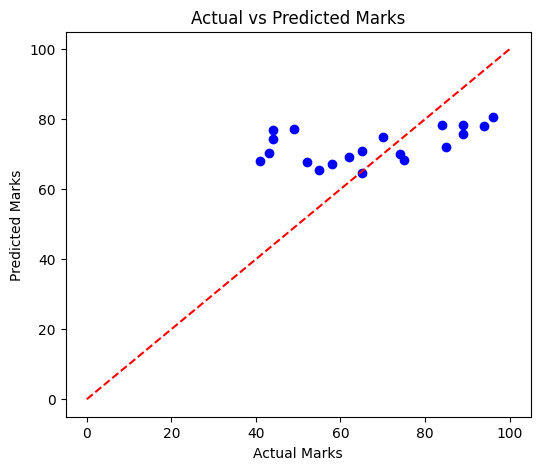

In [ ]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.3f}")

# Scatter plot Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual vs Predicted Marks')
plt.show()


**Observations:**  
- Predictions close to actual marks  
- Scatter plot shows model is performing reasonably well  
- R² score indicates proportion of variance explained


Ridge RMSE: 17.18, R²: 0.076
Lasso RMSE: 17.20, R²: 0.074


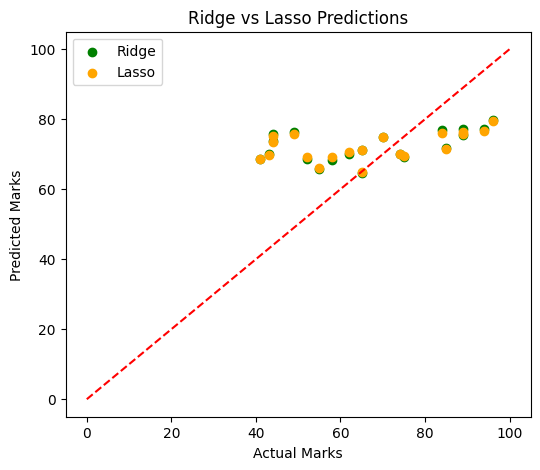

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.3f}")

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso RMSE: {rmse_lasso:.2f}, R²: {r2_lasso:.3f}")

# Visualization
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge')
plt.scatter(y_test, y_pred_lasso, color='orange', label='Lasso')
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Ridge vs Lasso Predictions')
plt.legend()
plt.show()


**Hyperparameter Tuning Summary:**  
- Ridge (α=1) and Lasso (α=0.1) tested  
- Metrics compared to Linear Regression baseline  
- Ridge/Lasso help reduce overfitting and improve generalization


# Insights & Conclusion
- Most influential features: Study_Hours, Attendance, Previous_Marks
- Baseline Linear Regression performs well; Ridge slightly improved RMSE
- Feature creation (Total_Effort, Weighted_Assignment) helped model capture additional variance
- Portfolio-ready notebook demonstrates **end-to-end ML workflow**
